# Исследование рынка заведений общественного питания Москвы.
___
<h3> Описание исследования. </h3> 
    
В данном исследовании мы поставим себя на место аналитика исследующего рынок общепита в Москве. Мы хотим открыть небольшое кафе в Москве. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке.

<h3> Цель исследования. </h3> 

**Провести исследование рынка заведений общественного питания Москвы, дать рекомендации о виде будущего заведения, вместимости и приоритетном расположении.**
    
Суть исследования: Проанализировать рынок общепита столицы по параметрам: геолокация, вместимость, тип заведения, сетевое оно или нет.

<h3>  Задачи исследования.</h3> 

В нашем исследовании мы ознакомимся с входными данными, подготовим их для исследования, проанализируем их по параметрам, найдём закономерности и взаимосвязи в параметрах. Определим оптимальные параметры для нашего будущего заведения и составим презентацию по результатам анализа для предоставления инвесторам.

<h3> Исходные данные. </h3>

У нас в распоряжении таблица с данными о заведениях общественного питания в Москве.

<h3>Содержание</h3>

##### Часть 1. Знакомство с данными:
* [1. Загрузка библиотек, изучение и описание файлов с данными.](#part1.1)
* [2. Вывод.](#part1.2)

##### Часть 2. Подготовка данных для исследования:
* [1. Работа с названиями заведений.](#part2.1)
* [2. Обработка дубликатов.](#part2.2)
* [3. Вывод.](#part2.3)


##### Часть 3. Анализ данных:
* [1. Анализ соотношения видов объектов общественного питания по количеству.](#part3.1)
* [2. Анализ соотношения сетевых и несетевых заведений по количеству.](#part3.2)
* [3. Анализ заведений с сетевым распространением: виды объектов, вместимость.](#part3.3)
* [4. Анализ соотношения видов объектов общественного питания по количеству посадочных мест.](#part3.4)
* [5. Анализ расположения заведений общепита, определение районов столицы с максимальным и минимальным количеством заведений.](#part3.5)
* [6. Анализ распределения количества посадочных мест для улиц с большим количеством объектов общественного питания.](#part3.6)
* [7. Вывод.](#part3.7)

##### Часть 4. Подготовка презентации:
* [Презентация.](#part4)

##### Часть 5. Формирование общего вывода:
* [Вывод.](#part5)
___

<a id='part1.1'></a>

## Часть 1. Знакомство с данными.
### Загрузка библиотек, изучение и описание файлов с данными.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import re
from io import BytesIO
import requests

In [2]:
df = pd.read_csv('catering.csv')

In [3]:
display(df.head())
df.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


- Количество строк в таблице - 15366
- Количество столбцов -  6

Распределение столбцов по типам:
- целочисленный - 2 столбца
- строковый	- 4 столбца

Согласно документации к данным:
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

<a id='part1.2'></a>

### Вывод.

В таблице с данными имеется 15366 строк, в каждой строке информация об одном заведении общественного питания - название, тип, адрес, вместимость, сетевое или нет. На первый взгляд данные чистые, пропусков нет, столбцы названы как подобает, типы данных в порядке. Посмотрим более детально на данные, в т.ч. на дубликаты на следующем этапе. 

<a id='part2.1'></a>

## Часть 2. Подготовка данных для исследования.
### Работа с названиями заведений.

Посмотрим, какие названия заведений встречаются чаще.

In [4]:
df['object_name'].value_counts().head(20)

Столовая                    267
Кафе                        236
Шаурма                      234
KFC                         155
Шоколадница                 142
Макдоналдс                  122
Бургер Кинг                 122
Домино'с Пицца               86
Теремок                      84
Крошка Картошка              82
Пекарня                      76
Милти                        65
Суши Wok                     61
Буфет                        59
СТОЛОВАЯ                     52
Папа Джонс                   50
Кофе с собой                 44
Школьно-базовая столовая     44
Чайхона №1                   42
КАФЕ                         41
Name: object_name, dtype: int64

Имеются много заведений без названия, обозначенные как Кафе и Столовая и такие же только в верхнем регистре. Так же в топе есть известные сети: Шоколадница, KFC, Бургер Кинг и т.д.. 

Проверим так же, есть ли в таблице строки где обозначены сетевые кафе, но такие строки в единичном экземпляре.

In [5]:
df.query('chain == "да"').groupby('object_name').agg({'id':'count'}).query('id == 1')

,id
object_name,
Beverly Hills Diner,1
Bierloga,1
Black & White,1
BooBo,1
Bubbleology,1
...,...
кафе «Нияма»,1
кафе «Папа Джонс»,1
кафе «Шоколадница»,1


Есть и таких строк 450! Но так же обнаружился нюанс, некоторые названия заведений отображены неправильно, например: Якитория, Папа Джонс, Шоколадница - из-за кавычек и дополнительного слова с  типом заведения эти заведения не попадают каждый в свою сеть. Наверняка таких строк будет много. Поправим эту ситуацию:
- приведём названия в нижний регистр;
- удалим из названий заведений все символы, кроме букв, цифр и пробелов
- удалим дополнительные слова с типом заведения хотя бы у топовых сетей

In [6]:
df['object_name'] = [x.lower() for x in df['object_name'].values]

top_chain_objects = df.query('chain == "да"').groupby('object_name').agg(
    {'id':'count'}).sort_values(by='id', ascending=False).head(30).index

top_chain_objects

Index(['шоколадница', 'kfc', 'макдоналдс', 'бургер кинг', 'теремок',
       'крошка картошка', 'домино'с пицца', 'милти', 'суши wok', 'папа джонс',
       'додо пицца', 'кофе с собой', 'чайхона №1', 'якитория', 'хинкальная',
       'кофе хаус', 'subway', 'тануки', 'хлеб насущный', 'starbucks',
       'прайм стар', 'иль патио', 'cofix', 'мята lounge', 'му-му', 'старбакс',
       'сабвей', 'андерсон', 'пицца хат', 'кафе «шоколадница»'],
      dtype='object', name='object_name')

In [7]:
def name_change(row):
    new_row = re.sub("[^a-zа-я0-9\s]", "", row)
    for name in top_chain_objects:
        if name in new_row:
            return name
    return new_row

In [8]:
df['object_name'] = df['object_name'].apply(name_change)

In [9]:
fake_chains = df.query('chain == "да"').groupby('object_name').agg({'id':'count'}).query('id == 1').reset_index()

print('Количество единичных заведений, указанных как сетевые после обработки названий -', 
      len(fake_chains))

Количество единичных заведений, указанных как сетевые после обработки названий - 227


Посмотрим изменился ли список часто встречающихся названий.

In [10]:
df['object_name'].value_counts().head(20)

столовая           321
кафе               278
шаурма             250
kfc                190
шоколадница        189
макдоналдс         173
бургер кинг        161
теремок            116
крошка картошка     96
хинкальная          94
доминос пицца       91
милти               83
буфет               82
пекарня             82
суши wok            76
папа джонс          68
кофе с собой        60
додо пицца          54
якитория            51
тануки              47
Name: object_name, dtype: int64

Изменилось, по всем названиям прибавление в количестве. 

Дальше переведём "неправильные" сетевые заведения переведём в "правильные" не сетевые. 

In [11]:
df.loc[df['object_name'].isin(fake_chains['object_name']), 'chain'] = 'нет'

print('Количество "неправильных" сетевых заведений = ',
      len(df.query('chain == "да"').groupby('object_name').agg({'id':'count'}).query('id == 1')))

Количество "неправильных" сетевых заведений =  0


<a id='part2.2'></a>

### Обработка дубликатов.

Как мы убедились ранее работать с названиями столбцов, пропусками и типами данных не нужно. Проверим данные на наличие дубликатов, для начала посмотрим на полные дубликаты.

In [12]:
df.duplicated().sum()

0

Полных дубликатов нет, проверим еще нет ли полных дубликатов не учитывая столбец `id`.

In [13]:
print('Количество неполных дубликатов без id -', len(df[df.loc[:, "object_name":"number"].duplicated()]))
print('Доля неполных дубликатов от общего количества заведений -', round(100 * len(df[df.loc[:, "object_name":"number"].duplicated()])/len(df), 2))

Количество неполных дубликатов без id - 85
Доля неполных дубликатов от общего количества заведений - 0.55


В целом, доля их невелика и они не окажут на картину анализа существенного влияния. Учитывая, что избавиться от них можно легко, очистим таблицу от не полных дубликатов.

In [14]:
full_duplicate_id = df[df.loc[:, 'object_name':'number'].duplicated()]['id']
print('Количество строк до удаления дубликатов -', len(df))
df = df.loc[~df['id'].isin(full_duplicate_id)]
print('Количество строк после удаления дубликатов -', len(df))

Количество строк до удаления дубликатов - 15366
Количество строк после удаления дубликатов - 15281


<a id='part2.3'></a>

### Вывод.

Данные подготовлены для исследования, выполнена работа с названиями заведений, крупные сети заведений дополнены филиалами, которые были неправильно названы. Удалены неявные дубликаты. В названиях заведений конечно еще есть ошибки, но самые значительные мы исправили, незначительные не должны повлиять на результаты исследования.

<a id='part3.1'></a>

## Часть 3. Анализ данных.
### Анализ соотношения видов объектов общественного питания по количеству.

Посмотрим, какие вообще существуют виды заведений в данных и их распределение по количеству. 

In [15]:
df['object_type'].value_counts()

кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1897
бар                                   855
буфет                                 576
кафетерий                             395
закусочная                            348
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Чтобы строить вертикальные графики для более привычной визуализации стоит изменить длинные названия типов заведений на более короткие, переименуем: магазин (отдел кулинарии) на магазин(ок) и предприятие быстрого обслуживания на аббревиатуру пбо.

In [16]:
df.loc[df['object_type'] == 'магазин (отдел кулинарии)', 'object_type'] = 'магазин(ок)'
df.loc[df['object_type'] == 'предприятие быстрого обслуживания', 'object_type'] = 'пбо'

Исследуем **соотношение видов объектов общественного питания по количеству**. Построим график.

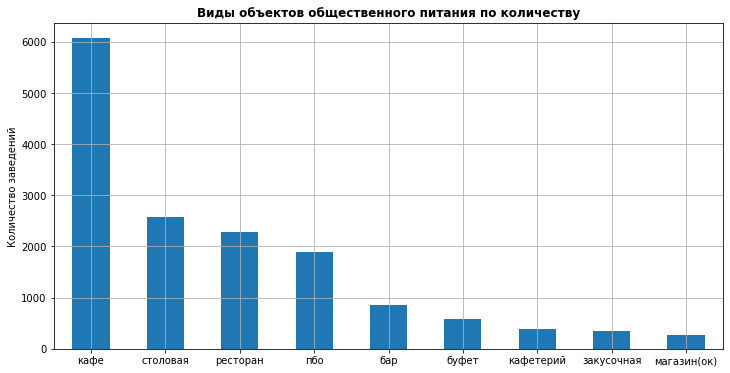

,
кафе,6071
столовая,2584
ресторан,2282
пбо,1897
бар,855
буфет,576
кафетерий,395
закусочная,348
магазин(ок),273


In [17]:
df.groupby('object_type').agg({'object_name':'count'}).sort_values(
    'object_name', ascending=False).rename(columns={'object_name':'objects'}).plot(
    kind='bar', y='objects', grid=True, rot=0, figsize=(12, 6), legend=None)
plt.title('Виды объектов общественного питания по количеству', fontsize=12, fontweight='bold')
plt.ylabel('Количество заведений')
plt.xlabel('')
plt.show()

df['object_type'].value_counts().to_frame().rename(columns={'object_type':''})

По графику и таблице можно выделить три группы типов заведений по распространённости:
- самое большое количество заведений это формат кафе - 6 тыс. из 15 тыс.
- на втором месте группа заведений примерно от 2 до 2.5 тыс штук - предприятие быстрого обслуживания, ресторан, столовая
- на третьем месте все остальные - до тысячи заведений - 855 баров, 576 буфетов и менее 400 кафетериев, закусочных и магазинов(отделов кулинарии)

<a id='part3.2'></a>

###  Анализ соотношения сетевых и несетевых заведений по количеству.

Исследуем **соотношение сетевых и несетевых заведений по количеству**. Построим график.

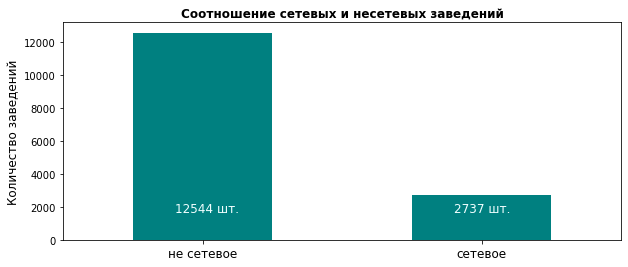

In [18]:
objects_by_chain = df.groupby('chain').agg({'object_name':'count'}).sort_values(
    'object_name', ascending=False).rename(columns={'object_name':'objects'})

objects_by_chain.plot(kind='bar', y='objects', rot='0', figsize=(10, 4), legend=None, color='teal')
plt.title('Cоотношение сетевых и несетевых заведений', fontsize=12, fontweight='bold')
plt.xticks([0,1], ['не сетевое', 'сетевое'], fontsize=12) 
plt.ylabel('Количество заведений', fontsize=12)
plt.xlabel('')
plt.text(-0.1, 1700, f'{objects_by_chain["objects"][0]} шт.', size='large', color='azure')
plt.text(0.9, 1700, f'{objects_by_chain["objects"][1]} шт.', size='large', color='azure')
plt.show()

В наших данных не сетевых заведений значительно больше, чем сетевых. Посмотрим распределение сетевых заведений по типам заведений и их соотношение с не сетевыми.

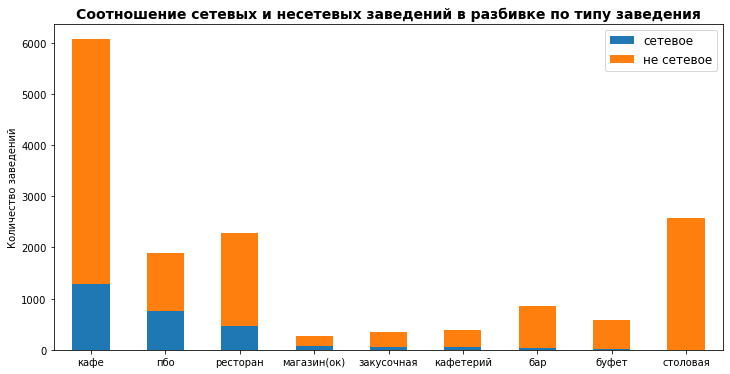

In [19]:
objects_by_chain_and_type = df.pivot_table(index='object_type', columns='chain', 
                                           values='id', aggfunc='count')

objects_by_chain_and_type.sort_values(by='да', ascending=False).plot(kind='bar', figsize=(12, 6),
                                                                     stacked=True, rot=0)

plt.title('Cоотношение сетевых и несетевых заведений в разбивке по типу заведения', 
          fontsize=14, fontweight='bold')
plt.ylabel('Количество заведений')
plt.xlabel('')
plt.legend(('сетевое', 'не сетевое'), fontsize=12)
plt.show()

По графику видно, что большая часть сетевых заведений приходится на кафе, предприятия быстрого обслуживания и рестораны и значительно меньше на всё остальное. Столовых и буфетов в сетевом формате вообще практически нет.


Посмотрим, для какого вида объекта общественного питания характерно сетевое распространение.

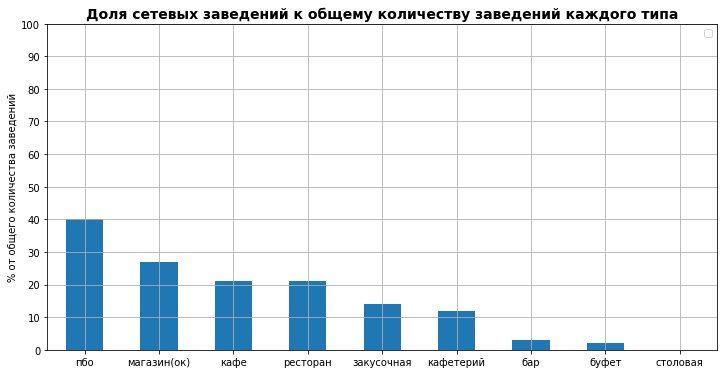

In [20]:
objects_by_chain_and_type['доля сетевых заведений к общему количеству'] = round(
    100 * objects_by_chain_and_type['да'] / (objects_by_chain_and_type['да'] + 
                                             objects_by_chain_and_type['нет'])
)

objects_by_chain_and_type.sort_values(by='доля сетевых заведений к общему количеству', ascending=False).plot(
    kind='bar', y='доля сетевых заведений к общему количеству', figsize=(12, 6), grid=True, rot=0)

plt.title('Доля сетевых заведений к общему количеству заведений каждого типа', 
          fontsize=14, fontweight='bold')
plt.yticks(np.arange(0, 101, 10))
plt.ylabel('% от общего количества заведений')
plt.xlabel('')
plt.legend('')
plt.show()

По диаграмме выше видно, что:
- сетевое распространение наиболее характерно для предприятий быстрого обслуживания - 40%; 
- около четверти всех отделов кулинарии в магазинах, кафе и ресторанов так же приходится на сетевые заведения;
- от 10% до 15% всех закусочных и кафетериев сетевые
- сетевой формат не характерен для баров, буфетов и столовых - менее 5%

<a id='part3.3'></a>

### Анализ заведений с сетевым распространением: виды объектов, вместимость.

Cделаем срез сетевых заведений сгруппируем по сетям, посчитаем количество объектов в сети и среднюю вместимость заведений сети.

In [21]:
df_chains = df.query('chain == "да"').groupby('object_name').agg({'id':'count', 'number':'mean'
    }).reset_index().rename(columns={'object_name':'chain', 'id':'objects', 'number':'avg_seats'})
print('\nВсего получилось', len(df_chains), 'сети.')
df_chains.head()


Всего получилось 204 сети.


,chain,objects,avg_seats
0,bocconcino,3,66.666667
1,burger club,3,20.333333
2,coffeeshop company,4,47.250000
3,cofix,25,9.600000
4,correas,3,44.000000


Чтобы ответить на вопрос - что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест, разобьём все сети на 4 группы: 
- много заведений - много мест; 
- много заведений - мало мест; 
- мало заведений - много мест;
- мало заведений - мало мест.

За "мало" возьмем первые 25% значений.

In [22]:
print('Посадочных мест мало, если их количество меньше либо равно - ', int(np.percentile(df_chains['avg_seats'], [25])))
print('Заведений в сети мало, если их количество меньше либо равно - ', int(np.percentile(df_chains['objects'], [25])))

Посадочных мест мало, если их количество меньше либо равно -  20
Заведений в сети мало, если их количество меньше либо равно -  2


In [23]:
df_chains['chain_size'] = 'много заведений'
df_chains.loc[df_chains['objects'] <= 2, 'chain_size'] = 'мало заведений'

df_chains['avg_seats_size'] = 'много мест'
df_chains.loc[df_chains['avg_seats'] <= 20, 'avg_seats_size'] = 'мало мест'

df_chains['Группа'] = df_chains['chain_size'] + ' - ' + df_chains['avg_seats_size']

df_chains.groupby('Группа').agg({'chain':'nunique', 'objects':'median', 'avg_seats':'median'})\
                           .rename(columns={'chain':'Число сетей', 'objects':'Медианное количество заведений', 
                                            'avg_seats':'Медианное количество посадочных мест'})

,Число сетей,Медианное количество заведений,Медианное количество посадочных мест
Группа,,,
мало заведений - мало мест,16,2.0,11.500
мало заведений - много мест,47,2.0,70.000
много заведений - мало мест,35,6.0,15.000
много заведений - много мест,106,6.0,66.125


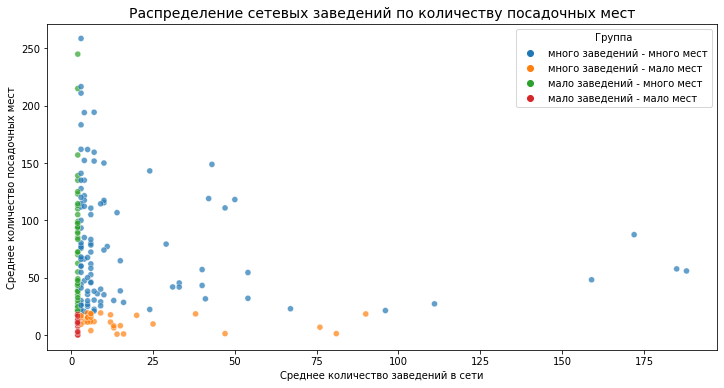

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='objects', y='avg_seats', data=df_chains, hue='Группа', alpha=0.7) 

plt.title('Распределение сетевых заведений по количеству посадочных мест', 
          fontsize=14)
plt.ylabel('Среднее количество посадочных мест')
plt.xlabel('Cреднее количество заведений в сети')
plt.show()

По диаграмме можно заключить: что для сетевых заведений характерно малое количество заведений в сети, но с большим количеством посадочных мест. Если разделять сетевые заведения условно не на две, а на три группы по количеству заведений в сети, то ответ бы был, что для малого и среднего количества заведений в сети характерно большое количество посадочных мест.

<a id='part3.4'></a>

### Анализ соотношения видов объектов общественного питания по количеству посадочных мест.

Проанализируем соотношение видов заведений по средней вместимости.

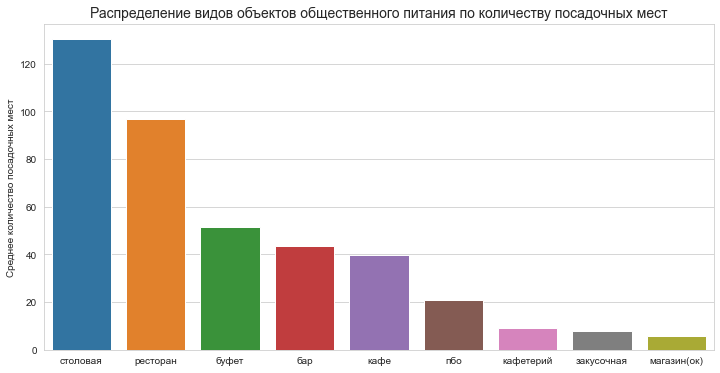

In [25]:
df_type_by_number = df.groupby('object_type').agg({'number':'mean'}).sort_values(
    by='number', ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.barplot(data=df_type_by_number, x='object_type', y='number')
plt.title('Распределение видов объектов общественного питания по количеству посадочных мест', 
          fontsize=14)
plt.ylabel('Среднее количество посадочных мест')
plt.xlabel('')
plt.show()

Среднее количество посадочных мест по видам заведений распределено так:
- больше всего вместимость у столовых - порядка 130 посадочных мест в среднем
- на втором месте рестораны с посадкой около 100 человек
- на третьем месте группа: буфеты, бары и кафе со средним количеством посадочных мест от 40 до 50
- на четвертом месте предприятия быстрого обслуживания, которые вмещают в среднем 20 человек
- на последнем месте группа видов заведений: кафетерий, закусочная и магазины(отделы кулинарии) - менее 10 посадочных мест в среднем 

Посмотрим схоже ли распределение типов заведений по вместимости в разбивке по сетевым/не сетевым.

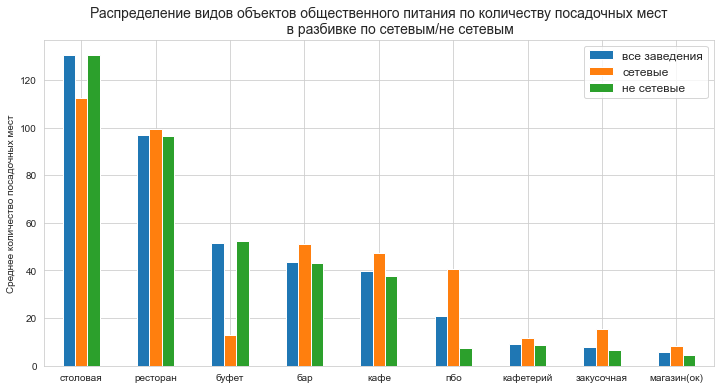

In [26]:
df_type_by_number_by_chain = df.pivot_table(index='object_type', columns='chain', 
                                            values='number').reset_index()
df_type_by_number_by_chain_final = df_type_by_number.merge(df_type_by_number_by_chain, \
                                   how='left', on='object_type').set_index('object_type')
df_type_by_number_by_chain_final.plot(kind='bar', figsize=(12, 6), grid=True, rot=0)

plt.title('Распределение видов объектов общественного питания по количеству посадочных мест\n \
          в разбивке по сетевым/не сетевым', fontsize=14)
plt.ylabel('Среднее количество посадочных мест')
plt.xlabel('')
plt.legend(('все заведения', 'сетевые', 'не сетевые'), fontsize=12)
plt.show()

Значимые отличия от общих данных:
- в сетевых буфетах значительно меньше вместимость, чем в не сетевых
- в сетевых предприятиях быстрого обслуживания значительно больше посадочных мест, чем в не сетевых

<a id='part3.5'></a>

### Анализ расположения заведений общепита, определение районов столицы с максимальным и минимальным количеством заведений.

Для определения расположения заведений общественного питания добавим новый столбец в таблицу, в нем будет храниться информация об улице из адреса объекта.

In [27]:
df['street'] = df['address'].apply(lambda x: x.split(',')[1])
df['street'] = df['street'].str.strip()
df.head(3)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица


Построим график **топ-10 улиц по количеству объектов общественного питания**. 

В топ-10 попадут город Зеленоград и поселение Сосенское это части Москвы, которые сами по себе улицами не являются, не будем их учитывать в анализе.

In [28]:
top_10 = df.groupby('street').agg({'id':'count'}).sort_values('id', ascending=False).reset_index().head(12)
top_10 = top_10.query('street != "город Зеленоград" & street != "поселение Сосенское"')
top_10

,street,id
1,проспект Мира,203
2,Профсоюзная улица,181
3,Ленинградский проспект,170
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
8,проспект Вернадского,128
9,Кутузовский проспект,114
10,Каширское шоссе,111
11,Кировоградская улица,108


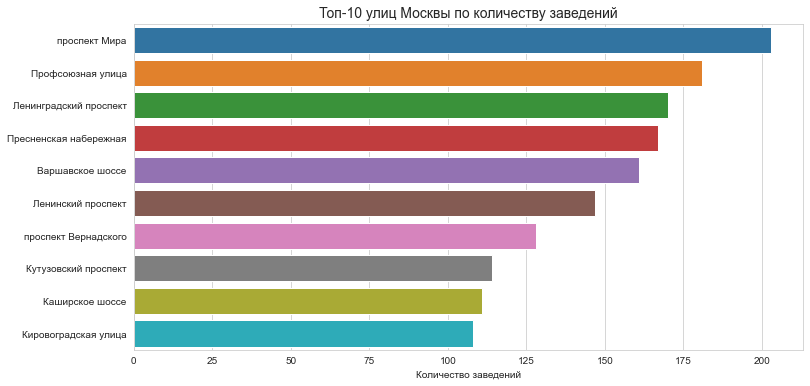

In [29]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

sns.barplot(data=top_10, x='id', y='street')
plt.title('Топ-10 улиц Москвы по количеству заведений', fontsize=14)
plt.ylabel('')
plt.xlabel('Количество заведений')
plt.show()

В топ-10 улиц по количеству заведений попали улицы от максимального количества заведений на проспекте Мира - чуть более 200 заведений до минимального на Кировоградской улице - порядка 110 заведений. В целом количество заведений от большего к меньшему достаточно равномерно уменьшается.

Воспользуемся внешней информацией и ответим на вопрос — **в каких районах Москвы находятся улицы с максимальным числом заведений**. Внешнюю информацию возьмём <a href="https://docs.google.com/spreadsheets/d/1CPDYDGjKCb6jGoQt9KR5WOvTspK-dHS3NUrVeqsyqJs/edit#gid=2139935940">с сайта Мосгаз</a>.

In [30]:
spreadsheet_id = '16kRKr06iLUUv5bN79dtuv_8OG2K1kMaS0SOhpgVhLQ0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets_msk = pd.read_csv(BytesIO(r.content))

streets_msk.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Глубокий переулок,17,ЦАО,Пресненский район


Получим список названий десяти топовых улиц. Посмотрим через какое количество районов проходит каждая такая улица.

In [31]:
top_10_street_names = top_10['street']
streets_msk.query('streetname in @top_10_street_names').groupby('streetname').agg({'area':'count'})\
    .sort_values('area', ascending=False)

,area
streetname,
Варшавское шоссе,8
Ленинский проспект,8
проспект Мира,7
Профсоюзная улица,6
проспект Вернадского,5
Каширское шоссе,4
Ленинградский проспект,4
Кировоградская улица,3
Кутузовский проспект,2


Мы видим, что половина улиц проходит через 5 и более районов, так же из таблицы ясно, что улиц, для которых не нашлось района - нет.

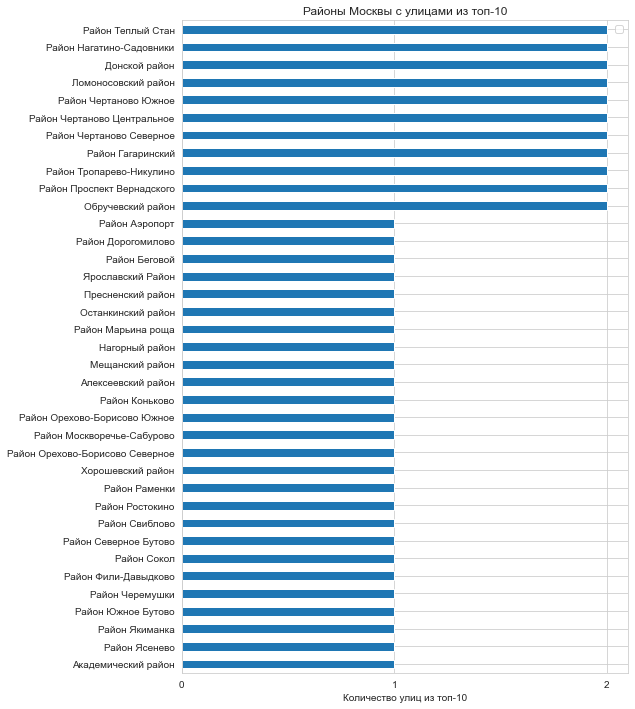

In [32]:
streets_msk.query('streetname in @top_10_street_names').groupby('area').agg({'streetname':'count'})\
    .sort_values(by='streetname').plot(kind='barh', figsize=(8, 12))

plt.title('Районы Москвы с улицами из топ-10') 
plt.xticks(np.arange(0, 2.1, 1))
plt.ylabel('')
plt.xlabel('Количество улиц из топ-10')
plt.legend('')
plt.show()

По диаграмме можно скзать только одно: из 37 районов с расположенными в них улицами из топ-10(с самым большим числом заведений) только в 11 расположены по 2 улицы, в остальных по одной. 

При этом есть интересное наблюдение - все районы с двумя топовыми улицами расположены в южной половине Москвы. Непонятно с чем это связано, возможно с тем, что "южные" улицы из топ-10 длинее и расположены на карте с меньшим расстоянием друг от друга. И поэтому такие улицы попадают в несколько районов чаще чем "северные".

Теперь найдём **число улиц с одним объектом общественного питания**.

In [33]:
streets_with_one_object = df.groupby('street').agg({'id':'count'}).query('id == 1').index
print('\nУлиц с единственным заведением -', len(streets_with_one_object), 'шт.')


Улиц с единственным заведением - 579 шт.


Так же как и на предыдущем шаге, воспользовавшись внешней информацией, ответим на вопрос — **в каких районах Москвы находятся улицы с одним заведением**.

In [34]:
# районы с улицами, где есть только одно заведение назовём условно "плохими"
bad_areas = streets_msk.query('streetname in @streets_with_one_object').groupby('area').agg({'streetname':'count'})\
    .sort_values(by='streetname').index
bad_areas
print('Районов, в которых есть улицы с единственным заведением -', len(bad_areas), 'шт.')

Районов, в которых есть улицы с единственным заведением - 99 шт.


В таком случае стоит найти районы в которых есть улицы с большим количеством заведений и нет улиц с единственным заведением.

In [35]:
# назовём такие районы условно "хорошими"
good_areas = streets_msk.query('streetname in @top_10_street_names').groupby('area')\
            .agg({'streetname':'count'}).sort_values(by='streetname').reset_index()
good_areas = good_areas.query('area not in @bad_areas').set_index('area').index
good_areas

Index(['Академический район', 'Район Орехово-Борисово Северное',
       'Район Орехово-Борисово Южное', 'Район Проспект Вернадского',
       'Район Тропарево-Никулино', 'Район Чертаново Центральное',
       'Ломоносовский район', 'Район Теплый Стан'],
      dtype='object', name='area')

Определим какие улицы из топ-10 расположены в "хороших" районах и посмотрим сколько таких районов приходится на каждую такую улицу, эти улицы будем считать перспективными. В таком случае районы, включающие одновременно и улицы из топ-10 и улицы с единственным заведением общественного питания в выборку не попадут.

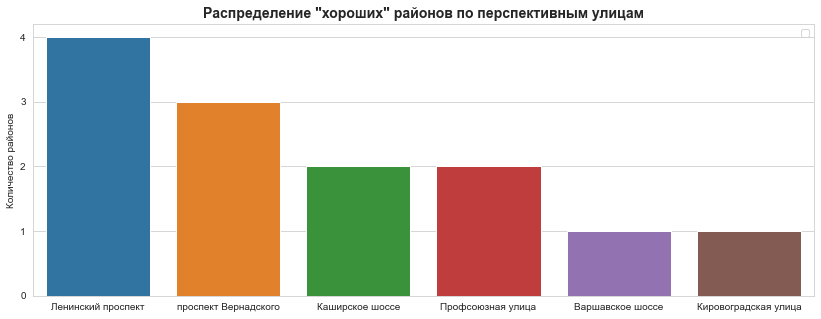

In [36]:
top_streets = streets_msk.query('streetname in @top_10_street_names').rename(columns={
    'streetname':'Улица', 'area':'Район'})
prospect_streets = top_streets.query('Район in @good_areas').groupby('Улица').agg({'Район':'count'})\
                    .reset_index().rename(columns={'Район':'Количество районов'})\
                    .sort_values('Количество районов', ascending=False)

plt.figure(figsize=(14, 5))
sns.set_style('whitegrid')

sns.barplot(data=prospect_streets, y='Количество районов', x='Улица')
plt.title('Распределение "хороших" районов по перспективным улицам', 
          fontsize=14, fontweight='bold')
plt.yticks(np.arange(0, 4.1, 1))
plt.ylabel('Количество районов')
plt.xlabel('')
plt.legend('')
plt.show()

Вот, что из этого вышло:
- есть 6 улиц, которые расположены в районах, в которых нет улиц с единственным объектом размещения
- 1 улица - Ленинский проспект - пересекает целых 4 таких района
- 1 улица - проспект Вернадского - пересекает 3 таких района
- 2 улицы - Профсоюзная и Каширское шоссе - пересекают по 2 таких района
- 2 улицы - Кировоградская и Варшавское шоссе - расположены в одном таком районе

Части улиц, расположенные в "хороших" районах могут стать перспективными местами для открытия кафе. Улицы и районы им соответствующие внесены в таблицу ниже. Вновь можно заметить, что в выборку попали улицы расположены в южной части столицы.

In [37]:
prospect_streets_and_areas = top_streets.query('Район in @good_areas').groupby(['Улица', 'Район'])\
                              .agg({'areaid':'count'}).reset_index()
prospect_streets_and_areas = prospect_streets_and_areas.drop('areaid', axis=1)
prospect_streets_and_areas

,Улица,Район
0,Варшавское шоссе,Район Чертаново Центральное
1,Каширское шоссе,Район Орехово-Борисово Северное
2,Каширское шоссе,Район Орехово-Борисово Южное
3,Кировоградская улица,Район Чертаново Центральное
4,Ленинский проспект,Ломоносовский район
5,Ленинский проспект,Район Проспект Вернадского
6,Ленинский проспект,Район Теплый Стан
7,Ленинский проспект,Район Тропарево-Никулино
8,Профсоюзная улица,Академический район
9,Профсоюзная улица,Район Теплый Стан


<a id='part3.6'></a>

### Анализ распределения количества посадочных мест для улиц с большим количеством объектов общественного питания.

Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Попробуем выявить закономерности на графике.

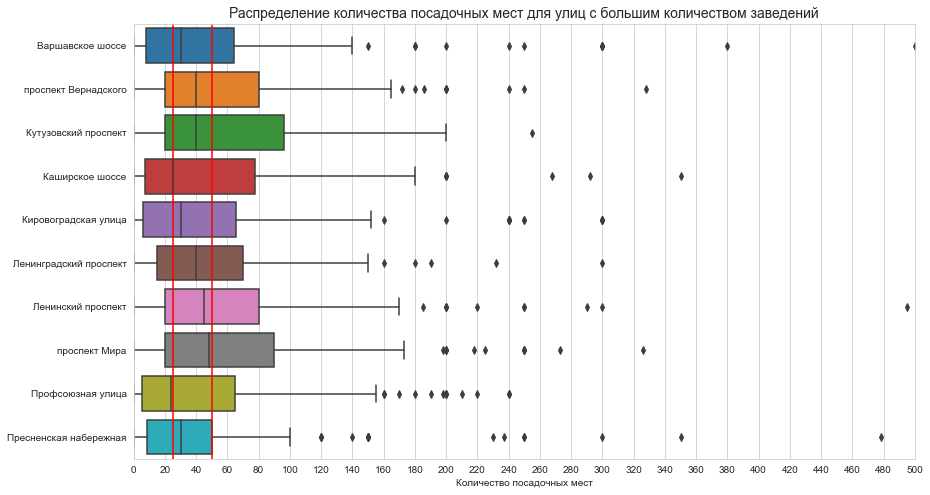

In [38]:
df_top_10 = df.query('street in @top_10_street_names')

plt.figure(figsize=(14, 8))
ax = sns.boxplot(y='street', x='number', data=df_top_10)

ax.set_title('Распределение количества посадочных мест для улиц с большим количеством заведений', fontdict={'fontsize':14})
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('')
ax.set_xticks(np.arange(0, 501, 20))
ax.set(xlim=(0, 500))
ax.axvline(25, color='r')
ax.axvline(50, color='r')

plt.show()

Для улиц с большим количеством заведений характерно следующее:
- медиана по вместимости составляет 25-50 человек по всем улицам
- по каждой улице имеются выбросы, очень крупные заведения
- заведений с маленьким количеством посадочных мест больше всего на Профсоюзной, Кировоградской улице, Пресненской набережной, Варшавском и Каширском шоссе
- заведений с большим количеством посадочных мест больше всего на всех проспектах: Мира, Ленинском, Ленинградском, Кутузовском и Вернадского

По выделенным на предыдущем шаге перспективным улицам можно сделать следующую рекомендацию:
- на Варшавском и Каширском шоссе, Кировоградской и Профсоюзной улице имеет смысл открывать кафе вместимостью 25-30 человек
- на проспектах Вернадского и Ленинском вместимостью 40-45 человек

<a id='part3.7'></a>

### Вывод.

Проведён анализ данных, по результатам котолого можно вывести следующие заключения:
- по оценке распространённости по типам можно выделить три группы типов заведений:
    - самое большое количество заведений это формат кафе - 6 тыс. из 15 тыс.
    - на втором месте группа заведений примерно от 2 до 2.5 тыс штук - предприятие быстрого обслуживания, ресторан, столовая
    - на третьем месте все остальные - до тысячи заведений - 855 баров, 576 буфетов и менее 400 кафетериев, закусочных и магазинов(отделов кулинарии)
    
**Промежуточные рекомендации по типу будущего объекта: предпочтительный тип заведения - кафе.**

- по анализу заведений в разбивке по сетевым/не сетевым:
    - в наших данных не сетевых заведений значительно больше, чем сетевых
    - большая часть сетевых заведений приходится на кафе, предприятия быстрого обслуживания и рестораны и значительно меньше на всё остальное. 
    - сетевое распространение наиболее характерно для предприятий быстрого обслуживания - 40%;
    - на втором месте - отделы кулинарии в магазинах, кафе и рестораны - около четверти приходится на сетевые заведения;
    - от 10% до 15% всех закусочных и кафетериев сетевые
    - сетевой формат не характерен для баров, буфетов и столовых - менее 5%
    - для сетевых заведений характерно малое(или среднее, если разделять на три группы) количество заведений в сети, но с большим количеством посадочных мест
    
**Промежуточные рекомендации по формату будущего объекта: для кафе лучше планировать малую сеть заведений с большим количеством посадочных мест**
    
- по оценке вместимости заведений:
    - больше всего вместимость у столовых - порядка 130 посадочных мест в среднем
    - на втором месте рестораны с посадкой около 100 человек
    - на третьем месте группа: буфеты, бары и кафе со средним количеством посадочных мест от 40 до 50
    - на четвертом месте предприятия быстрого обслуживания, которые вмещают в среднем 20 человек
    - на последнем месте группа видов заведений: кафетерий, закусочная и магазины(отделы кулинарии) - менее 10 посадочных мест в среднем
    - отличия от общих данных при анализе распределения типов заведений по вместимости в разбивке по сетевым/не сетевым:
        - в сетевых буфетах значительно меньше вместимость, чем в не сетевых
        - в сетевых предприятиях быстрого обслуживания значительно больше посадочных мест, чем в не сетевых
        
**Промежуточные рекомендации по вместимости будущего объекта: оптимальная вместимость кафе - 40-50 человек**
        
- по анализу локации заведений:
    - выделены топ-10 улиц по количеству заведений, в них попали улицы от максимального количества заведений на проспекте Мира - чуть более 200 заведений до минимального на Кировоградской улице - порядка 110 заведений. В целом количество заведений от большего к меньшему достаточно равномерно уменьшается.
    - из 37 районов столицы с расположенными в них улицами из топ-10 только в 11 районах расположены по 2 улицы, в остальных по одной.
    - все районы с двумя топовыми улицами расположены в южной половине Москвы
    - улиц с единственным заведением - 579 шт, эти улицы распределены по 99 районам Москвы
    - есть 6 улиц из топ-10, которые расположены в районах, в которых нет улиц с единственным объектом размещения
    - части улиц, расположенные в "хороших" районах могут стать перспективными местами для открытия кафе. Улицы и районы им соответствующие внесены в таблицу ниже.


| Перспективная улица             |В каком районе расположена перспективная часть улицы      |
|:--------------------------------|:---------------------------------------------------------|
| Ленинский проспект              |Ломоносовский                                             |
|                                 |Проспект Вернадского                                      |
|                                 |Тропарево-Никулино                                        |
|                                 |Теплый Стан                                               |
|                                 |                                                          |
| проспект Вернадского            |Ломоносовский                                             |
|                                 |Проспект Вернадского                                      |
|                                 |Тропарево-Никулино                                        |
|                                 |                                                          |
| Профсоюзная улица               |Теплый Стан                                               |
|                                 |Академический                                             |
|                                 |                                                          |
| Каширское шоссе                 |Орехово-Борисово Северное                                 |
|                                 |Орехово-Борисово Южное                                    |
|                                 |                                                          |
| Варшавское шоссе                |Чертаново Центральное                                     |
|                                 |                                                          |
| Кировоградская улица            |Чертаново Центральное                                     |

- при анализе улиц с большим количеством заведений:
    - медиана по вместимости составляет 25-50 человек по всем улицам
    - по каждой улице имеются выбросы, очень крупные заведения
    - заведений с маленьким количеством посадочных мест больше всего на Профсоюзной, Кировоградской улице, Пресненской набережной, Варшавском и Каширском шоссе
    - заведений с большим количеством посадочных мест больше всего на всех проспектах: Мира, Ленинском, Ленинградском, Кутузовском и Вернадского

**Промежуточные рекомендации по локации и вместимости будущего объекта:**
- **на Варшавском и Каширском шоссе, Кировоградской и Профсоюзной улице имеет смысл открывать кафе вместимостью 25-30 человек**
- **на проспектах Вернадского и Ленинском вместимостью 40-45 человек**

<a id='part4'></a>

## Часть 4. Подготовка презентации.

Презентация для инвесторов: 

<https://drive.google.com/file/d/1UT0ZobzYoKVk_EjLcbLpU57cVteOvYT8/view?usp=sharing>



<a id='part5'></a>

## Часть 5. Формирование общего вывода.

Итак, поставив себя на место аналитика исследующего рынок общепита в Москве, мы закончили исследование.
___
На входе были получены чистые данные без пропусков и полных дубликатов, которые были подготовлены:
- выполнена работа с названиями заведений, крупные сети заведений дополнены филиалами, которые были неправильно названы
- удалены неявные дубликаты
___
Проведён анализ данных:
- по оценке распространённости по типам можно выделить три группы типов заведений:
    - самое большое количество заведений это формат кафе
    - на втором месте группа заведений - предприятие быстрого обслуживания, ресторан, столовая
    - на третьем месте все остальные
- по анализу заведений в разбивке по сетевым/не сетевым:
    - сетевых заведений значительно больше, чем сетевых
    - большая часть сетевых заведений приходится на кафе, предприятия быстрого обслуживания и рестораны и значительно меньше на всё остальное. 
    - сетевое распространение наиболее характерно для предприятий быстрого обслуживания, отделов кулинарии в магазинах, кафе и ресторанов, менее характерно для закусочных и кафетериев и совсем не характерно для баров, буфетов и столовых
    - для сетевых заведений характерно относительно малое количество заведений в сети, но с большим количеством посадочных мест
- по оценке вместимости заведений:
    - больше всего вместимость у столовых и ресторанов - 100-130 человек
    - средняя вместимость буфетов, баров и кафе от 40 до 50 человек
    - предприятия быстрого обслуживания, кафетерий, закусочная и магазины(отделы кулинарии) - менее 20 посадочных мест в среднем
- по анализу локации заведений:
    - выделены топ-10 улиц по количеству заведений, из 37 районов столицы с расположенными в них улицами из топ-10 только в 11 районах расположены по 2 улицы, в остальных по одной
    - улиц с единственным заведением - 579 шт, эти улицы распределены по 99 районам Москвы
    - есть 6 улиц из топ-10, которые расположены в районах, в которых нет улиц с единственным объектом размещения
- при анализе улиц с большим количеством заведений(из топ-10):
    - медиана по вместимости составляет 25-50 человек по всем улицам
    - заведений с маленьким количеством посадочных мест больше всего на Профсоюзной, Кировоградской улице, Пресненской набережной, Варшавском и Каширском шоссе
    - заведений с большим количеством посадочных мест больше всего на всех проспектах: Мира, Ленинском, Ленинградском, Кутузовском и Вернадского
___
Полученные результаты исследования оформлены в презентаци, где описаны сформированные рекомендации для инвесторов по открытию кафе.
___
**Можно сформировать финальные рекомендации по открытию заведения:**
- **предпочтительный тип объекта общественного питания - кафе.**
- **для кафе лучше планировать малую сеть заведений с большим количеством посадочных мест**
- **оптимальная вместимость кафе без привязки к локации - 40-50 человек**
- **кафе вместимостью 25-30 человек имеет смысл открывать в районе Чертаново Центральное - на Варшавском шоссе и Кировоградской улице, в Орехово-Борисово Северное и Южное - на Каширском шоссе, в районе Теплый Стан и Академическом - на Профсоюзной улице**
- **кафе вместимостью 40-45 человек имеет смысл открывать в районе Тёплый стан на Ленинском проспекте, а так же в районах Проспект Вернадского, Тропарево-Никулино и Ломоносовский на том же Леннинском проспекте и на проспекте Вернадского**
___